In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

## One Sample T-Test

#### This compares a data sample to a population

In [44]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print(population_ages.mean())
print(minnesota_ages.mean())

43.000112
39.26


In [45]:
null_hypothesis = "The sample / point estimate is not statistically different than our known population / descriptive statistics"
statistical_threshold = 0.05

In [47]:
sample_stdv = np.std(minnesota_ages, ddof=1)
sample_mean = minnesota_ages.mean()
sample_size = len(minnesota_ages)
population_mean = population_ages.mean()

t_value = (population_mean - sample_mean) / (sample_stdv / (sample_size ** 0.5))

print(sample_stdv, sample_mean, sample_size, population_mean)
print(t_value)

10.273425198351445 39.26 50 43.000112
2.5742714883655022


In [53]:
#Shows relationship between t-statistic and p-value
(1 - stats.t.cdf(abs(t_value), df = sample_size - 1)) * 2

0.01311868542506156

In [46]:
#ttest on the mean
t_statistic, p_value = stats.ttest_1samp(a = minnesota_ages, popmean = population_ages.mean())
print(t_statistic, p_value)

-2.5742714883655027 0.013118685425061678


In [58]:
if p_value > statistical_threshold == True:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")


We reject the null hypothesis


In [56]:
#Create a confidence interval

sigma = minnesota_ages.std()/math.sqrt(sample_size)

stats.t.interval(0.95, #Confidence Level
                df = sample_size - 1, # Degrees of Freedom
                loc = sample_mean,
                scale = sigma)

(36.369669080722176, 42.15033091927782)

In [59]:
#Changing the confidence level to 99%, makes it so that we cannot reject the null hypothesis

sigma = minnesota_ages.std()/math.sqrt(sample_size)

lb, ub = stats.t.interval(0.99, #Confidence Level
                df = sample_size - 1, # Degrees of Freedom
                loc = sample_mean,
                scale = sigma)
print(lb, ub)

35.40547994092107 43.11452005907893


In [60]:
if lb <= sample_mean <= ub:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


## Two sample T-Test

In [66]:
np.random.seed(12)

wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsi_ages1, wisconsi_ages2))

print(wisconsin_ages.mean())

42.8


In [67]:
stats.ttest_ind(minnesota_ages, 
                wisconsin_ages, 
                equal_var = False)

TtestResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748, df=97.9724575497005)

#### We'd expect to see two samples have means this far apart 9% of the time if they belonged to the same population. We would faile to reject the null hypothesis with a confidence interval of 95% 

## Paired T-Test

#### This type of test is appropriate when you have two sets of observations that are related or paired in some way, such as before and after studies.

In [71]:
np.random.seed(11)

before = stats.norm.rvs(scale=5, loc=-1.25, size=100)

after = before + stats.norm.rvs(scale = 5, loc = -1.25, size = 100)

weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change:":after-before})

weight_df.describe()

,weight_before,weight_after,weight_change:
count,100.000000,100.000000,100.000000
mean,-1.192409,-2.422784,-1.230375
std,4.688757,6.616974,4.783696
min,-14.516593,-19.003106,-11.495286
25%,-4.513160,-6.275342,-4.046211
50%,-1.111532,-3.022943,-1.413463
75%,2.189524,2.005771,1.738673
max,9.533372,14.409241,9.759282


In [72]:
stats.ttest_rel(before, after)

TtestResult(statistic=2.572017599856831, pvalue=0.011596444318439777, df=99)

## Type 1 and Type 2 Errors

#### Type 1 Error - Incorrectly reject the null hypothesis
#### Type 2 Error - Incorrectly fail to reject the null hypothesis

Text(0, 0.02, 'Type 2 Error')

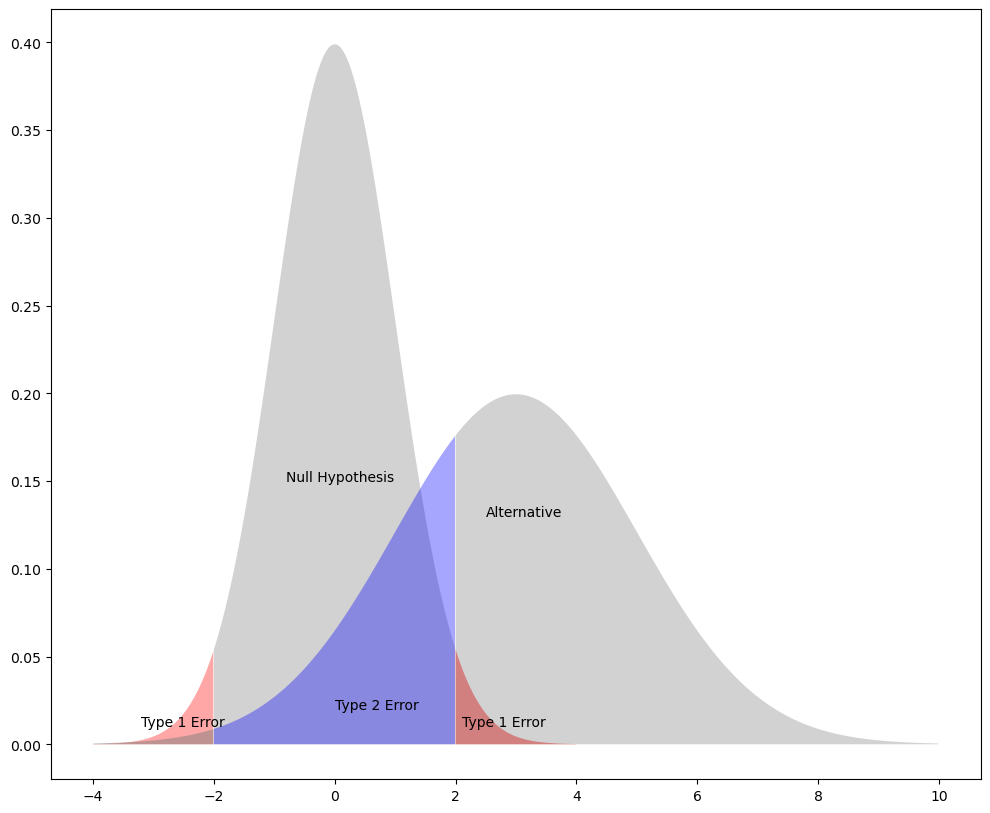

In [78]:
#Visualizing Type 1 and Type 2 Errors

plt.figure(figsize = (12,10))

plt.fill_between(x=np.arange(-4,-2,0.01),
                y1 = stats.norm.pdf(np.arange(-4,-2,0.01)),
                facecolor = 'red',
                alpha= 0.35)

plt.fill_between(x=np.arange(-2,2,0.01),
                y1 = stats.norm.pdf(np.arange(-2,2,0.01)),
                facecolor = 'grey',
                alpha= 0.35)

plt.fill_between(x=np.arange(2,4,0.01),
                y1 = stats.norm.pdf(np.arange(2,4,0.01)),
                facecolor = 'red',
                alpha= 0.5)

plt.fill_between(x=np.arange(-4,-2,0.01),
                y1 = stats.norm.pdf(np.arange(-4,-2,0.01), loc = 3, scale = 2),
                facecolor = 'grey',
                alpha= 0.5)

plt.fill_between(x=np.arange(-2,2,0.01),
                y1 = stats.norm.pdf(np.arange(-2,2,0.01), loc = 3, scale = 2),
                facecolor = 'blue',
                alpha= 0.35)

plt.fill_between(x=np.arange(2,10,0.01),
                y1 = stats.norm.pdf(np.arange(2,10,0.01), loc = 3, scale = 2),
                facecolor = 'grey',
                alpha= 0.35)

plt.text(x = -0.8, y=0.15, s = "Null Hypothesis")
plt.text(x = 2.5, y=0.13, s = "Alternative")
plt.text(x = 2.1, y=0.01, s = "Type 1 Error")
plt.text(x = -3.2, y=0.01, s = "Type 1 Error")
plt.text(x = 0, y=0.02, s = "Type 2 Error")